# Simple Linear Regression

### Importing Packages

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# plt - alteration
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# warnings
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

### Importing Dataset

In [30]:
df = pd.read_csv("data1.csv")
df.head()

,x,y
0,17,94
1,13,73
2,12,59
3,15,80
4,16,93


## Data Analysis

In [31]:
print(f"Number of records : {df.shape[0]}")
print(f"Number of column : {df.shape[1]}")

Number of records : 120
Number of column : 2


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       120 non-null    int64
 1   y       120 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


In [33]:
df.describe()

,x,y
count,120.00000,120.000000
mean,15.60000,79.700000
std,2.06776,11.028306
min,12.00000,59.000000
25%,14.00000,73.000000
50%,16.00000,79.500000
75%,17.00000,91.000000
max,19.00000,94.000000


<AxesSubplot:>

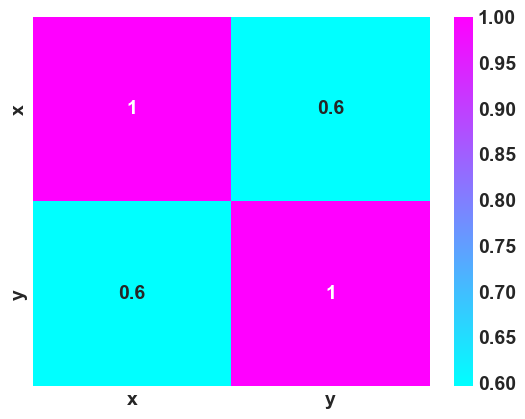

In [34]:
sns.heatmap(df.corr(),annot=True,cmap='cool')

Text(0.5, 1.0, 'Distribution of y Axis')

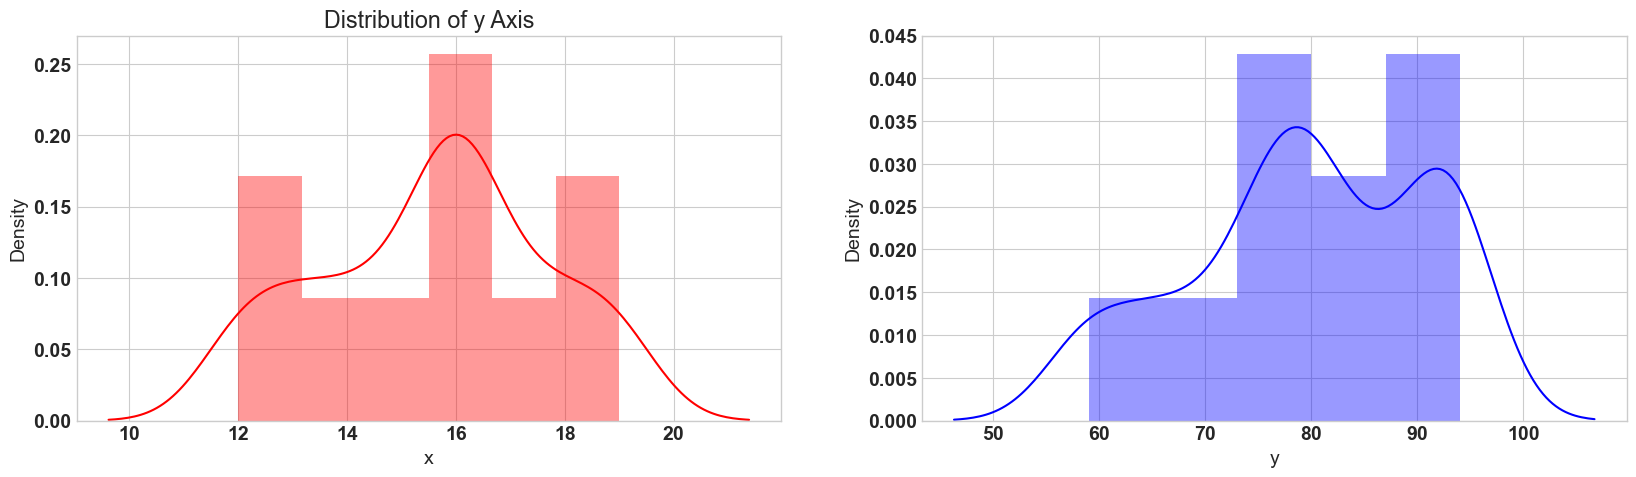

In [35]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
sns.distplot(df['x'],color='r',ax=ax1)
ax1.set_title('Distribution of X Axis')
sns.distplot(df['y'],color='b',ax=ax2)
ax1.set_title('Distribution of y Axis')

# Simple Linear Regression
### y = m * x + c
#### m = slope
#### c = intercept

### Train Test Split

In [36]:
shuffle = df.sample(frac=1)
train_size = int(0.7* len(df))
train = shuffle[:train_size]
test = shuffle[train_size:]

In [37]:
print(f"Shape of training data: {train.shape}")
print(f"Shape of test data : {test.shape}")

Shape of training data: (84, 2)
Shape of test data : (36, 2)


In [38]:
x_train = train['x']
y_train = train['y']
x_test  = train['x']
y_test  = train['y']

### Simple Linear Model

In [39]:
def SimpleRegressionModel(x_train,y_train):
    N = len(x_train)
    numerator = 0
    denominator = 0
    
    x_mean = x_train.mean()
    y_mean = y_train.mean()
    
    s_yixi   = (y_train * x_train).sum()
    yixi_Byn = (y_train.sum() * x_train.sum())/N
    
    s_xixi = (x_train * x_train).sum()
    xixi_Byn = (x_train.sum() * x_train.sum())/N
    
    slope = (s_yixi - yixi_Byn)/(s_xixi - xixi_Byn)
    
    intercept = y_mean - (slope * x_mean)
    
    return (slope,intercept)

In [40]:
m,c = SimpleRegressionModel(x_train,y_train)
print (f'm = {m} \nc = {c}')
print(f"Equation of Best Fit :\n y = {m} * x + {c}")

m = 2.876144680550152 
c = 35.17986069370296
Equation of Best Fit :
 y = 2.876144680550152 * x + 35.17986069370296


Text(0, 0.5, 'Y')

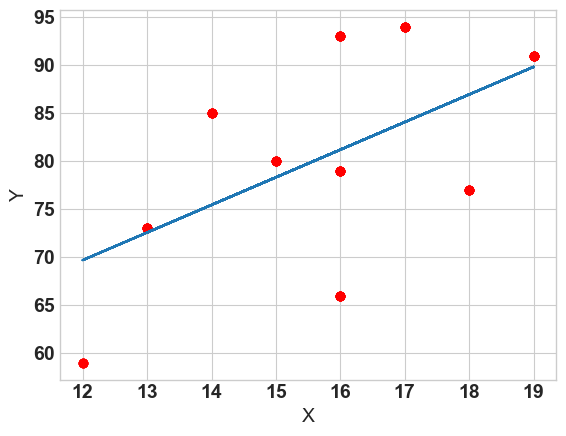

In [41]:
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,m*x_train+c)
plt.xlabel('X')
plt.ylabel('Y')

### Model Prediction

In [42]:
def prediction(x_train,slope,intercept):
    predict = x_train * slope + intercept
    return predict

In [43]:
y_pred = prediction(x_test,m,c)
y_pred[:5]

98     86.950465
101    72.569742
109    89.826610
71     72.569742
37     81.198176
Name: x, dtype: float64

In [44]:
y_test[:5]

98     77
101    73
109    91
71     73
37     79
Name: y, dtype: int64

In [45]:
test = y_test
pred = y_pred
test = pd.DataFrame(test)
pred = pd.DataFrame(pred)
df1 = pd.concat([test, pred], axis=1)
df1

,y,x
98,77,86.950465
101,73,72.569742
109,91,89.826610
71,73,72.569742
37,79,81.198176
...,...,...
26,66,81.198176
118,77,86.950465
72,59,69.693597
80,94,84.074320


## Residual Sum of Squares

In [46]:
def rss(y_test,y_pred):
    residual = y_test - y_pred
    rss = (residual * residual).sum()
    return rss

In [47]:
rss(y_test,y_pred)

6255.537319237705

#### R - Squared

In [48]:
def r_square(y_test,y_pred):
    residual = y_test - y_pred
    rss = (residual * residual).sum()
    rest = y_test - y_test.mean()
    tot = (rest*rest).sum() 
    return (1 - rss/tot)

In [49]:
r_square(y_test,y_pred)

0.30807774428126544

#### Mean Absolute Error and Mean Absolute Percentage Error

In [50]:
def Mean_Absolute_Error(y_test,y_pred):
    var = (y_test - y_pred).abs().sum()
    MAE = var/len(y_test)
    return MAE

In [51]:
Mean_Absolute_Error(y_test,y_pred)

6.896163436558727

In [52]:
def Mean_Absolute_Percentage_Error(y_test,y_pred):
    var = ((y_test - y_pred)/y_test).abs().sum()
    MAPE = var/len(y_test)*100
    return MAPE

In [53]:
Mean_Absolute_Percentage_Error(y_test,y_pred)

8.908795224331866

### Model Evaluation 

In [54]:
m_per_dict = {'Mean_Absolute_Percentage_Error':Mean_Absolute_Percentage_Error(y_test,y_pred),"Mean_Absolute_Error":Mean_Absolute_Error(y_test,y_pred),"R_Squared":r_square(y_test,y_pred),"residual_sum_of_squares":rss(y_test,y_pred)}
model_performance = pd.DataFrame(m_per_dict,index=['Values'])
model_performance

,Mean_Absolute_Percentage_Error,Mean_Absolute_Error,R_Squared,residual_sum_of_squares
Values,8.908795,6.896163,0.308078,6255.537319
